In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

plt.rcParams['font.family'] = 'Arial'

import warnings
warnings.filterwarnings("ignore")

In [3]:
# "PLSDA diversity analysis was performed using Metaboanalyst."
# https://www.metaboanalyst.ca//

file_path = './Data/plsda_score.csv'

df_plsda = pd.read_csv(file_path).set_index('sampleid')

In [ ]:
# b-diveristy

def plot_confidence_ellipse(data, confidence_level=0.90):
    mean_x, mean_y = np.mean(data, axis=0)
    cov_matrix = np.cov(data, rowvar=False)
    
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)
    
    if confidence_level == 0.95 :
        chi_square_val = 5.991
    elif confidence_level == 0.90 :
        chi_square_val = 4.605
    elif confidence_level == 0.8 :
        chi_square_val = 3.219
    else:
        raise ValueError('CI')

    scale = np.sqrt(chi_square_val)
    
    width, height = 2 * scale * np.sqrt(eigvals)
    
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

    return (mean_x, mean_y), width, height, angle

def cal_ellipse(data, group_name, component1='Component1', componet2='Component2', cl=0.9):
    data = data[data.group == group_name]
    data = data[[component1, componet2]].values

    (mean_x, mean_y), width, height, angle = plot_confidence_ellipse(data, confidence_level=cl)

    return (mean_x, mean_y), width, height, angle


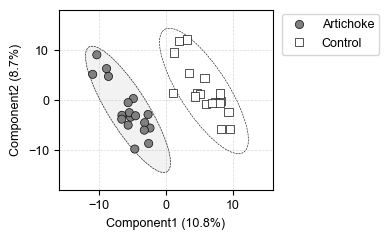

In [ ]:
palette = ['gray', 'white']
orders = ['Control', 'Artichoke']


marker_size = 35
alpha = 0.8
is_ellipse = True

fig, ax = plt.subplots(figsize=(4, 2.5))

data = df_plsda


if is_ellipse:
    alpha=0.1
    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[0], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='white', facecolor='white', alpha=alpha)
    ax.add_patch(ellipse)


    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[1], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='gray', facecolor='gray', alpha=alpha)
    ax.add_patch(ellipse)


    alpha=1

    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[0], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='black', facecolor='none', alpha=alpha, linestyle='--', linewidth=0.4)
    ax.add_patch(ellipse)
    

    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[1], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='black', facecolor='none', alpha=alpha, linestyle='--', linewidth=0.4)
    ax.add_patch(ellipse)
 


unique_groups = data['group'].unique()
markers = ['o', 's', ]  

marker_dict = {group: marker for group, marker in zip(unique_groups, markers)}

sns.scatterplot(
    data=data,
    x='PC1',
    y='PC2',
    hue='group',
    style='group',
    markers=marker_dict,
    s=marker_size,
    edgecolor='k',
    palette=palette
)

if True:
    plt.xlabel(f'Component1 (10.8%)', fontsize=9)
    plt.ylabel(f'Component2 (8.7%)', fontsize=9)
    plt.xticks(fontsize=9,)
    plt.yticks(fontsize=9)
    plt.legend( bbox_to_anchor=(1.01, 1.01), fontsize=9)
    # plt.gca().get_legend().remove()


    #plt.yticks([-0.3, -0.15, 0, 0.15, 0.3])
    plt.xlim(-16, 16)
    plt.ylim(-18, 18)


    plt.tight_layout()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
    plt.savefig('./Figures/PLS-DA.png', dpi=600)